# AST 502 Final Project: Detecting Internal Tensions in DES-Y1

## Paul Rogozenski

# The Dark Energy Survey

The Dark Energy Survey (DES) aims to reveal the mysterious nature of dark energy in the universe through weak-lensing analysis of hundreds of millions of galaxies. DES measures galaxy weak lensing through three two-point functions (galaxy clustering, galaxy-galaxy lensing, and cosmic shear) defined as:

-Galaxy Clustering: Describes the (over)abundance of galaxy pairs at a given redshift bin at angular separation, $\theta$ as $w(\theta)$

-Galaxy-Galaxy Lensing: Describes the weak-lensing shear experienced by a background galaxy (source) lensed by a foreground galaxy (lens) given an angular separation on the sky, $\theta$, and the redshift bin of each galaxy ($\gamma_t(\theta)$). The background galaxy experiences a tangential shear perpendicular to the line connecting the source and the lens.

-Cosmic Shear: Describes the shape of a galaxy as the sum and difference of the tangential and cross components of the shear ($\xi_\pm(\theta)$) given an angular separation on the sky, $\theta$, and the redshift bin of each galaxy.


DES utilizes 5 lens redshift bins and 4 source redshift bins, with 20 angular bins distributed evenly in log space from 2.5 to 250 arcminutes, which amounts to datavectors of 900 parameters. Combining all three two-point functions yields the most constraining weak-lensing constraints on cosmological parameters to-date, called the 3x2pt analysis. We also define a 2x2pt analysis, which consists of galaxy clustering and galaxy-galaxy lensing.

DES has taken data from 2013-2019, where we consider the first year's data, Y1, in this work. 

See https://arxiv.org/abs/1708.01530 for more details.

# Bayesian Evidence Ratio

Traditionally, the Bayesian Evidence Ratio has been used to quantify agreement/disagreement between data sets. Recalling that Bayes' Theorem is given as $P(\vec{\theta}|d, \mathcal{H}) = \frac{P(d | \vec{\theta}, \mathcal{H})P(\vec{\theta}| \mathcal{H})}{P(d | \mathcal{H})} $, meaning the posterior probability distribution is the product of the likelihood, $P(d | \vec{\theta}, \mathcal{H})$, and the prior, $P(\vec{\theta}| \mathcal{H})$, divided by the evidence for a given dataset, $d$, model $\mathcal{H}$, and parameters, $\vec{\theta}$.

Assuming independent data sets, such that the joint likelihood is seperable, we may define the evidence ratio as $R = \frac{P(d_1, d_2 |\mathcal{H}_0)}{P(d_1|\mathcal{H}_1)P(d_2|\mathcal{H}_1)}$, where $\mathcal{H}_1$ represents the model of independent data sets and $\mathcal{H}_0$ that of joint data for data sets $d_1$ and $d_2$. 

The most popular scale with which we quantify the level of (dis)agreement, or tension, is the Jeffreys Scale, defined below (Jeffreys, H. (1961) Theory of Probability. 3rd Edition, Clarendon Press, Oxford). In the original work the term 'Bayes Factor', or 'BF', is used instead of $R$.

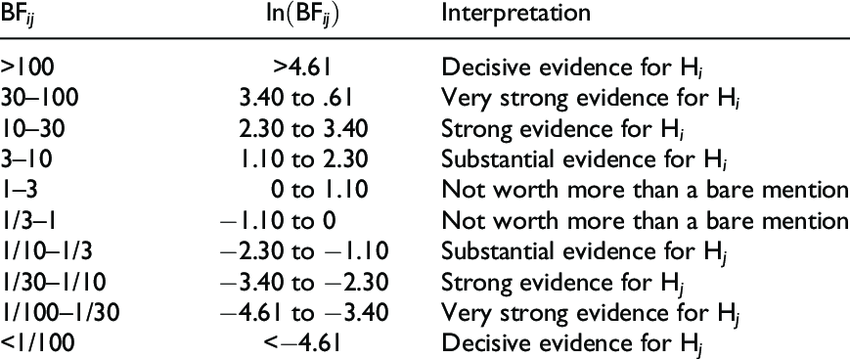

# A word of caution in interpreting the Bayesian Evidence Ratio

Knowing that the evidence is essentially a normalization of the joint likelihood and prior distributions, the evidence is defined explicitly as $P(d | \mathcal{H}) = \int P(d | \vec{\theta}, \mathcal{H})P(\vec{\theta}| \mathcal{H}) d\vec{\theta}$. In the simple case of a Gaussian likelihood on a flat prior, the Evidence, $E$, is given as $\ln E = \ln(\frac{V_L}{V_\pi}) + \ln L_{max}$, with $V_L$ the likelihood volume, $V_\pi$ the prior volume, and $L_{max}$ the maximum likelihood point. 

For independent datasets/likeihoods 1 and 2, the evidence ratio is found to be proportional to the prior volume as $\ln R \propto \ln \frac{V_{1,2}V_\pi}{V_1 V_2}$. This means that given sufficiently wide priors, *one may induce false agreement between datasets as defined by the Jeffreys Scale* (https://arxiv.org/abs/astro-ph/0412535).

DES enforces wide, flat priors when inferring cosmological parameters. As the cosmological parameters are found using complex non-linear transforms of the two-point functions, it is worth asking the question:

## How sensitive is the Bayesian Evidence Ratio in detecting internal tensions within DESY1?

# Experiment Set-up


Internal tension is defined as components of the survey not agreeing with one another. In our work, we will examine the agreement between 2x2pt and shear analyses defining the evidence ratio a little more nicely as $R = \frac{E_{3x2pt}}{E_{shear} E_{2x2pt}}$. Many samplers will report the natural log of these values, as they are *very* large. In order to see if the evidence ratio is sensitive to internal tensions, we must first know *a priori* by how much a measurement is in tension with our fiducial set-up, which is in general unknown outside of simulated experiments. We then evaluate the evidence of the data vector with known tension and observe. We define confidence intervals in $\chi^2$ space, as we are working with hundreds of parameters. 

# SNR of fiducial data vector
Let us first look at the Signal-To-Noise of our fiducial cosmology data vector given the Y1 covariance matrix, as derived in https://arxiv.org/abs/1706.09359, to relate to my talk on PCAs.

We see through a singular value decomposition (plotted in a similar fashion to a skree plot) that 68% of the signal is found in the first 50 PCAs, 95% in the first 208 PCAs, and 99% in the first 355 PCAs. However, garnering 5$\sigma$ of information requires nearly all PCAs. Therefore in this case in precision cosmology, dimensional reduction is not favorable.

49 207 354 852


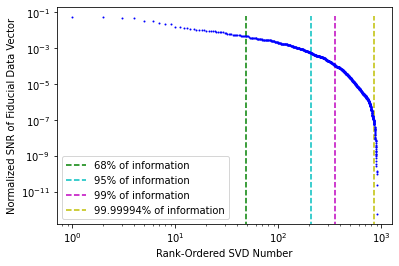

In [3]:
import os, math, numpy as np
import matplotlib.pyplot as plt

covfile = "./PRogozenski_data/cov_y3_mcal_halofit_final.txt"
datafile = "./PRogozenski_data/Paul_Y3_datav_3x2pt_baseline"
ndata= 900

rawcov = np.genfromtxt(covfile)

cov = np.zeros((ndata,ndata))
for i in range(0,(ndata*ndata)):
	cov[int((rawcov[i])[0]), int((rawcov[i])[1])] = float((rawcov[i])[2])
for i in range(ndata):
	cov[i] = np.array(cov[i])
snrs = []

datav = np.genfromtxt(datafile)[:,1]

U, Sdiag, VT = np.linalg.svd(cov, full_matrices = False)
V= VT.T

vec = V.dot(datav)

for i in range(len(Sdiag)):
	snrs.append(vec[i]/Sdiag[i])

snrs = np.abs(np.array(snrs))

snrs = (np.sort(snrs)/np.sum(snrs))[::-1]

cumsum = 0.0
index68 = 0
index95 = 0
index99 = 0
index5s = 0
for i in range(900):
    cumsum += snrs[i]
    if cumsum <=0.68:
        index68 = i
    if cumsum<=.95:
        index95 = i
    if cumsum<=.99:
        index99 = i
    if cumsum<=.9999994:
        index5s = i



plt.xlabel("Rank-Ordered SVD Number")
plt.ylabel("Normalized SNR of Fiducial Data Vector")
plt.plot(range(1, 901),(snrs),  'bo', markersize = 1)
plt.vlines(index68, 0, 0.06, color = 'g', linestyle = '--', label = "68% of information")
plt.vlines(index95, 0, 0.06, color = 'c', linestyle = '--', label = "95% of information")
plt.vlines(index99, 0, 0.06, color = 'm', linestyle = '--', label = "99% of information")
plt.vlines(index5s, 0, 0.06, color = 'y', linestyle = '--', label = "99.99994% of information")
print(index68, index95, index99, index5s)
plt.yscale("log")
plt.xscale("log")
plt.legend(loc = "best")
plt.show()

# Defining *a priori* confidence intervals
To define our confidence intervals, we generate hundreds of millions of simulated data vectors with noise (as inferred by our given covariance matrix). This allows us to generate the statistics needed to define confidence intervals out to 5$\sigma$ agreement. However as the DES datavectors contain up to 900 parameters, it is nearly impossible to define confidence intervals for each parameter. Instead we define these intervals using the $\Delta\chi^2$ summary statistic. We generate our simulated samples by first establishing a fiducial cosmology/datavector using ```CosmoLike``` and using the covariance and ```Numpy``` to generate noise about the fiducial data vector.



The principle components in $\chi^2$ space yield the axes of greatest variance. Note the small asymmetry of the 578,000,000 $\chi^2$ samples, below. This is typical for $\chi^2$ distributions, but as we have datavectors of hundreds of parameters long, the first few confidence intervals are well-approximated by those of a Gaussian distribution, which are the confidence intervals shown below. The more-accurate evaluation of the confidence intervals are given in the next slide. The orange and blue axes are the principle axes and the red dashed line represents the 1-to-1 relationship. From this plot we also identify that the shear and 2x2pt portions of the 3x2pt analysis are weakly correlated, strengthening our definition of the evidence ratio definition of having independent data sets.


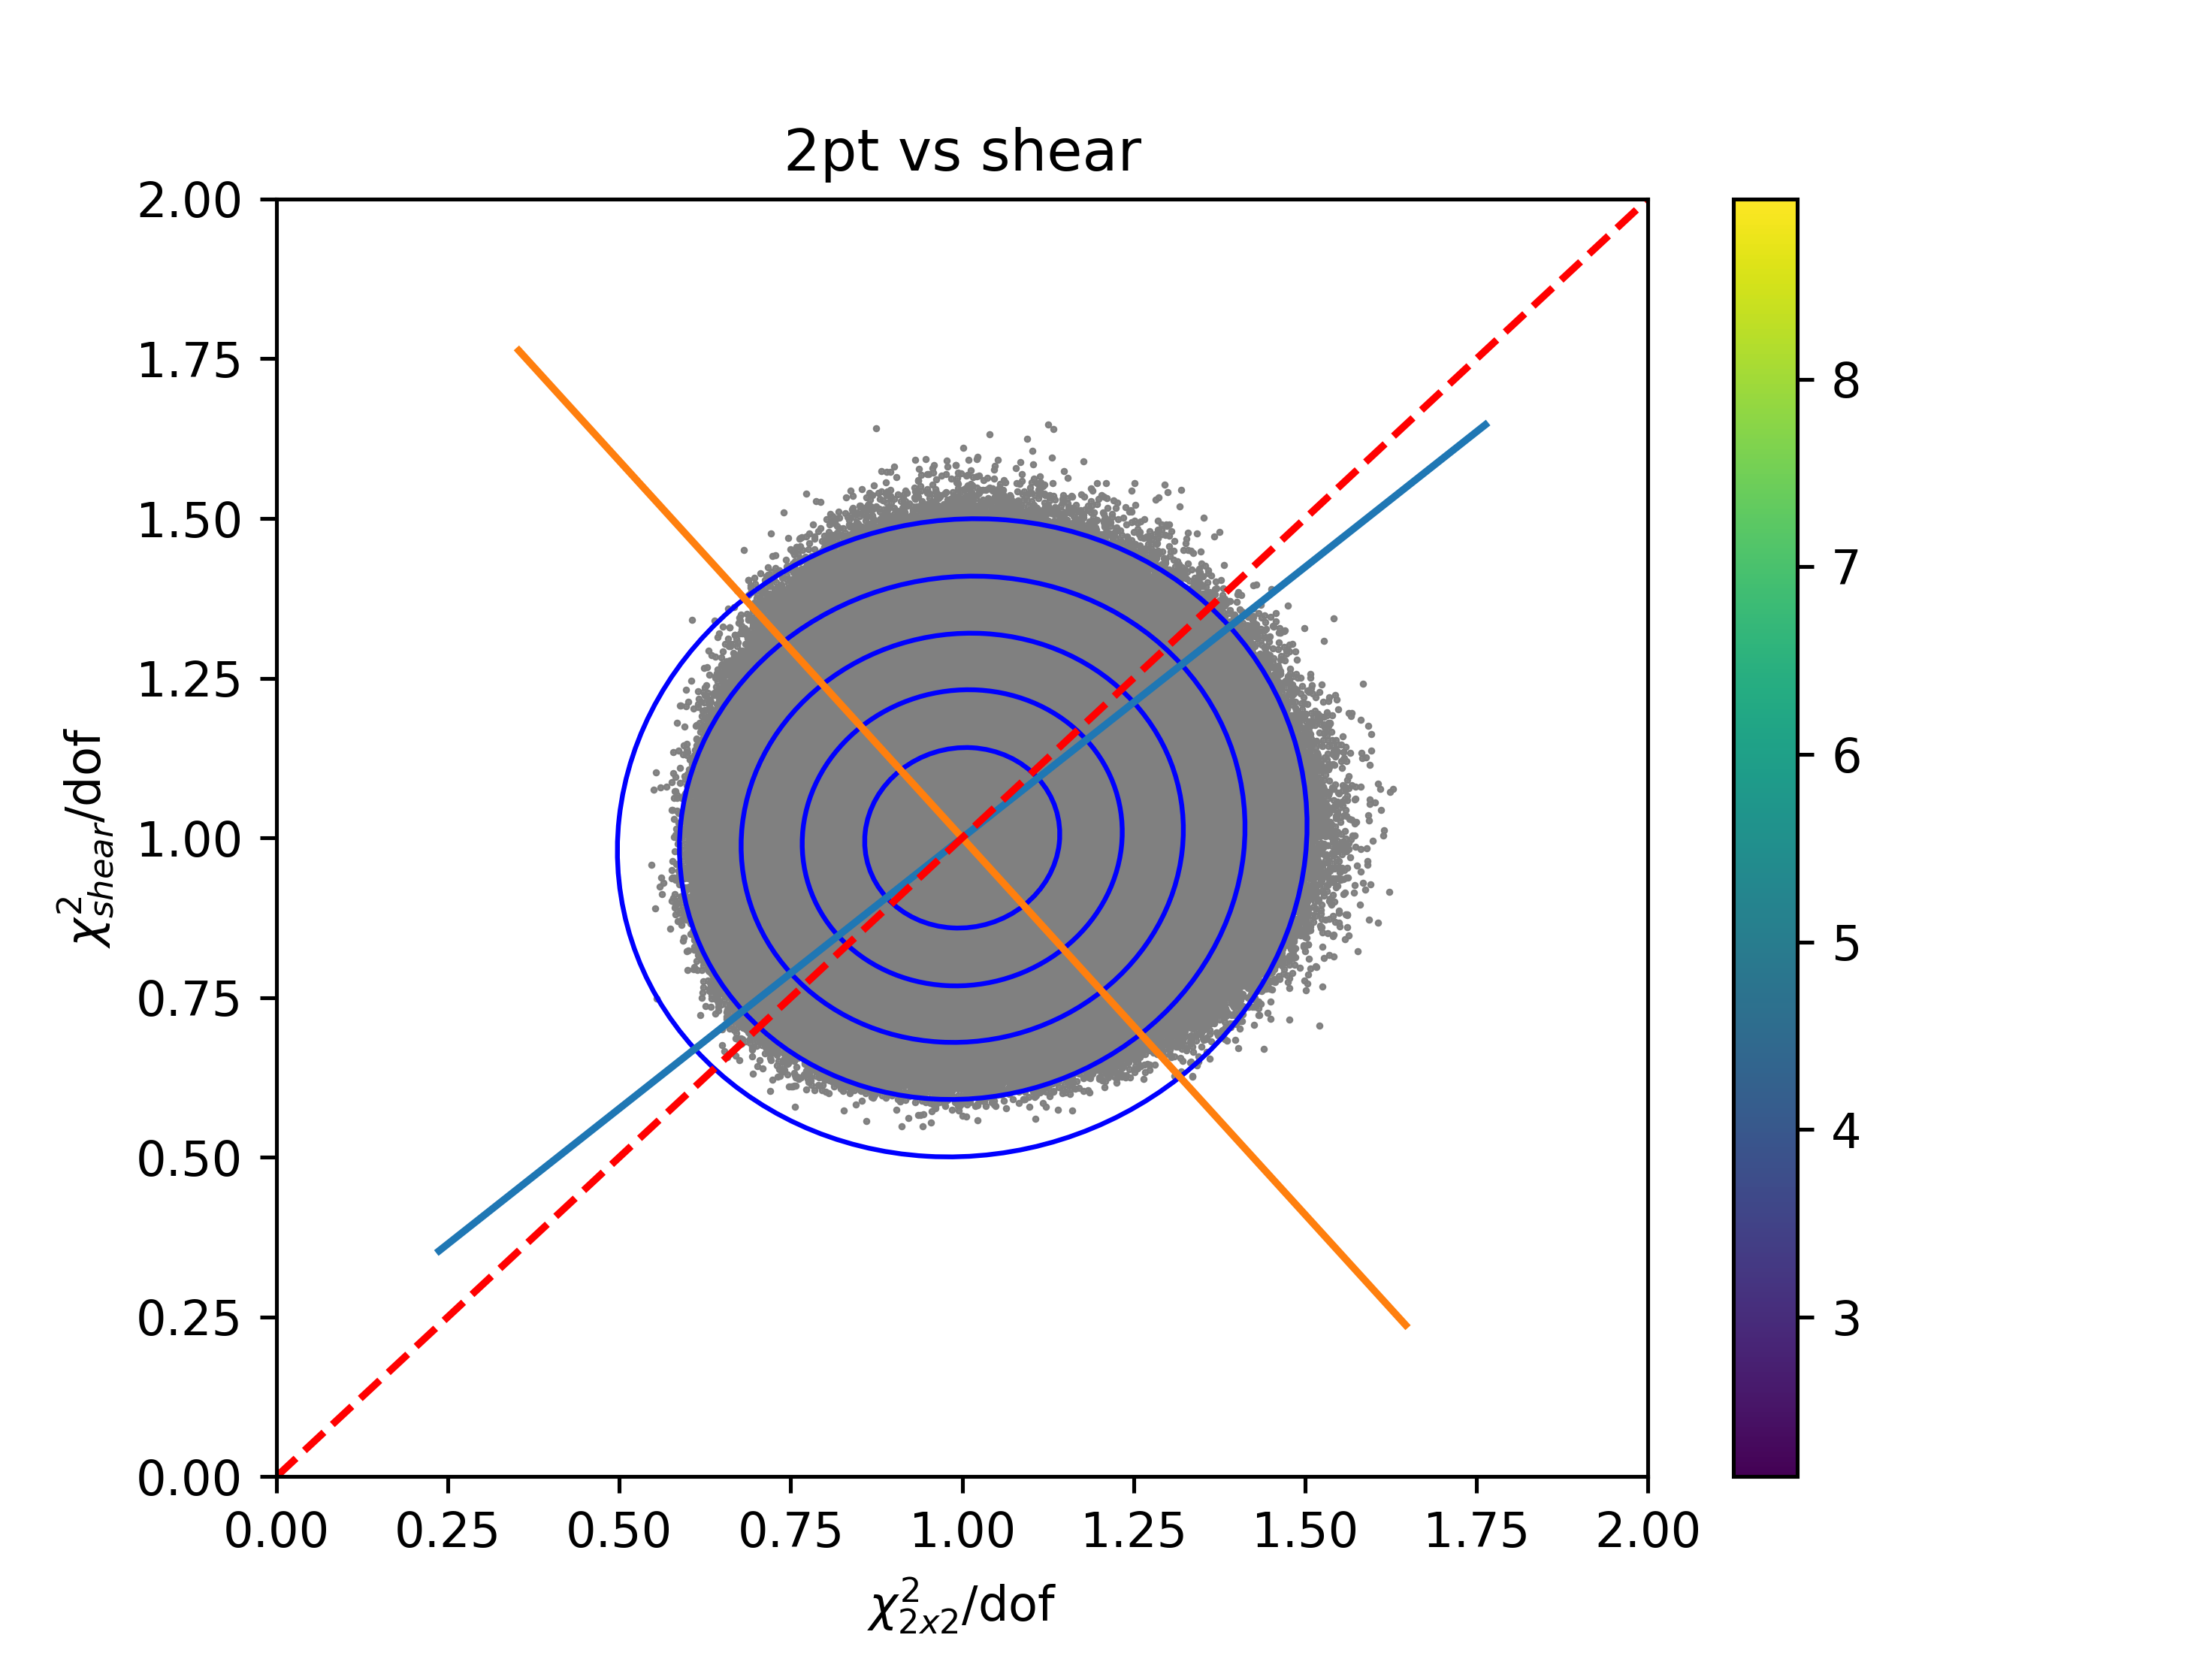

This is a 4D example of (most of) the above procedures given a toy model. We treat two $\chi^2$ quantities, as above, as $x$ and $y$, which are the first two and last two elements of the 4D fiducial vector. 

1.009639117147896 0.9686825816585781


"\nchi2x=np.array(chi2x)/2\nmeanx = np.mean(chi2x)\nchi2y=np.array(chi2y)/2\nmeany = np.mean(chi2y)\n\ncovchi2 = np.cov(chi2x, chi2y)\n\nvals, vec = np.linalg.eig(covchi2)\nif vals[0]>vals[1]:\n    vec1 = vec[0]\n    vec2 = vec[1]\n    sigma1 = vals[0]\n    sigma2 = vals[1]\nelse:\n    vec2 = vec[0]\n    vec1 = vec[1]\n    sigma2 = vals[0]\n    sigma1 = vals[1]\n\na = np.abs(np.arctan(vec1[1]/vec1[0])) * 180.0/np.pi\n\n\nplt.plot(chi2x, chi2y, 'bo', markersize = .5)\nplt.plot(meanx, meany, 'ro')\nplt.show()\n"

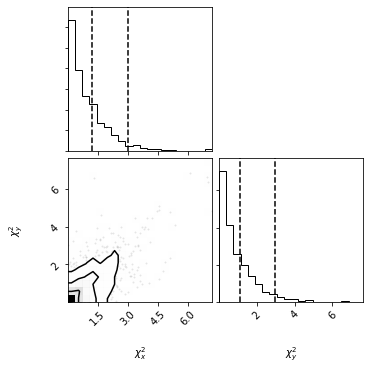

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

import corner
A = np.array([[0.74070196, 0.8086692,  0.202076,   0.44037011],[0.53595529, 0.03196287,
 0.472471, 0.57458052], [0.00803064, 0.99289868, 0.85573803, 0.11580094],
 [0.67901081, 0.13731895, 0.83423944, 0.61213181]])
cov = (A.T).dot(A)
invcov = np.linalg.inv(cov)
fid = np.array([10., 10., 10., 10.])
n=1000
noisey = np.random.multivariate_normal(fid, cov, n)
chi2x = []
chi2y = []
covx = cov[:2, :2]
covy = cov[2:, 2:]
invcovx = np.linalg.inv(covx)
invcovy = np.linalg.inv(covy)
for j in range(n):
    chi2x.append((((noisey[j][:2] - fid[:2])).dot(invcovx)).dot(noisey[j][:2] - fid[:2]))
    chi2y.append((((noisey[j][2:] - fid[2:])).dot(invcovy)).dot(noisey[j][2:] - fid[2:]))

temp = np.array(list(zip(chi2x, chi2y)))/2
figure = corner.corner(temp, labels = [r"$\chi^2_x$", r"$\chi^2_y$"], quantiles = [0.68, 0.95])
meanx = np.mean(chi2x)/2
meany = np.mean(chi2y)/2
print(meanx, meany)

'''
chi2x=np.array(chi2x)/2
meanx = np.mean(chi2x)
chi2y=np.array(chi2y)/2
meany = np.mean(chi2y)

covchi2 = np.cov(chi2x, chi2y)

vals, vec = np.linalg.eig(covchi2)
if vals[0]>vals[1]:
    vec1 = vec[0]
    vec2 = vec[1]
    sigma1 = vals[0]
    sigma2 = vals[1]
else:
    vec2 = vec[0]
    vec1 = vec[1]
    sigma2 = vals[0]
    sigma1 = vals[1]

a = np.abs(np.arctan(vec1[1]/vec1[0])) * 180.0/np.pi


plt.plot(chi2x, chi2y, 'bo', markersize = .5)
plt.plot(meanx, meany, 'ro')
plt.show()
'''   

Now that we have established our confidence intervals, we know exactly how much "error" we are inserting into a data vector and can compare our induced error to that which should appear through the Jeffreys Scale. We generate datavectors unformly along the 1, 3, and 5 $\sigma$ confidence intervals and run chains though the ```Polychord``` sampler to evaluate the evidence integral. Our results are shown below. Referring back to the Jeffreys Scale, we see that nearly all points "agree" at every confidence interval *despite our induced noise*. This implies that the Jeffreys Scale is, indeed, biased towards agreement. A tension metric that removes the prior dependencies or a scale that incorporates prior dependencies would be best to use to determine exact levels of disagreement.

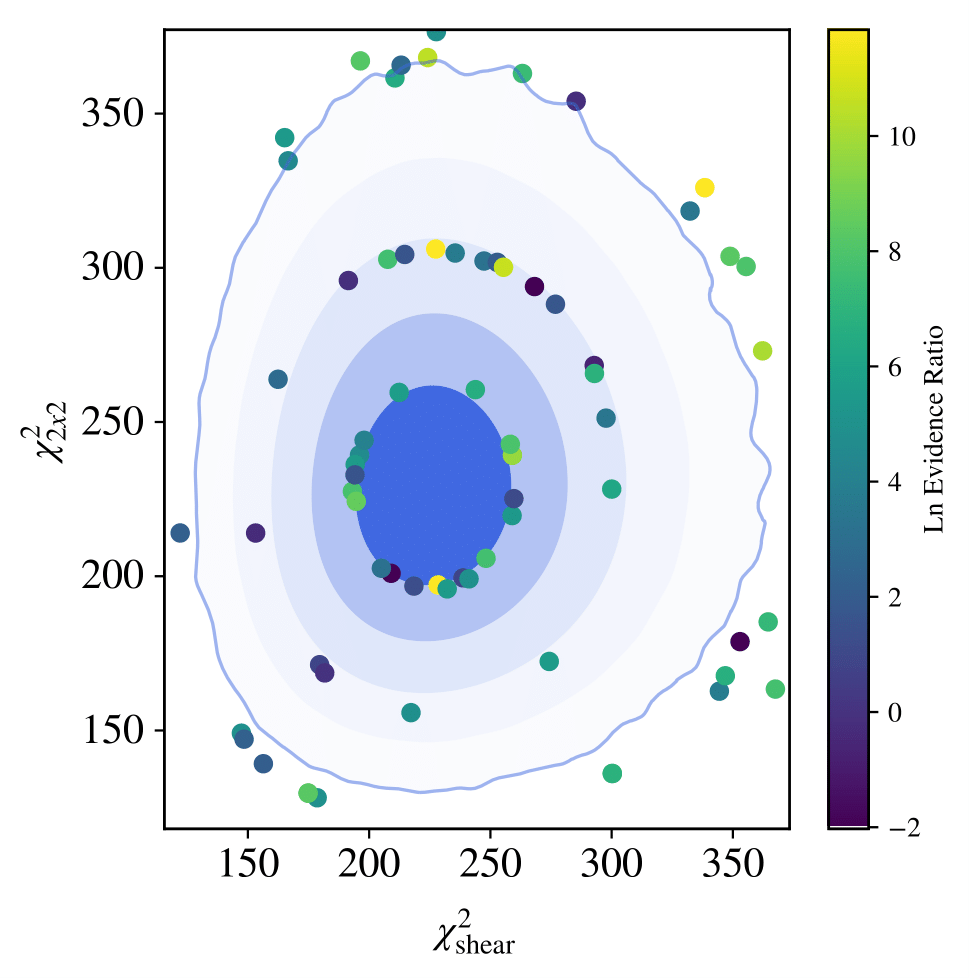

Below is a 1D version of the above plot. Dotted lines are the mean evidence ratio for the 1, 3, and 5 sigma confidence intervals. The purple line denotes the evidence ratio of our fiducial data vector and the black line denotes the evidence ratio of the official DES-Y1 analysis. The scatter about our fiducial cosmology for each confidence interval does not point to a clear trend between levels of disagreement within DES, but rather that the evidence ratio using the Jeffreys scale is insenstitive to internal noise fluctuations.

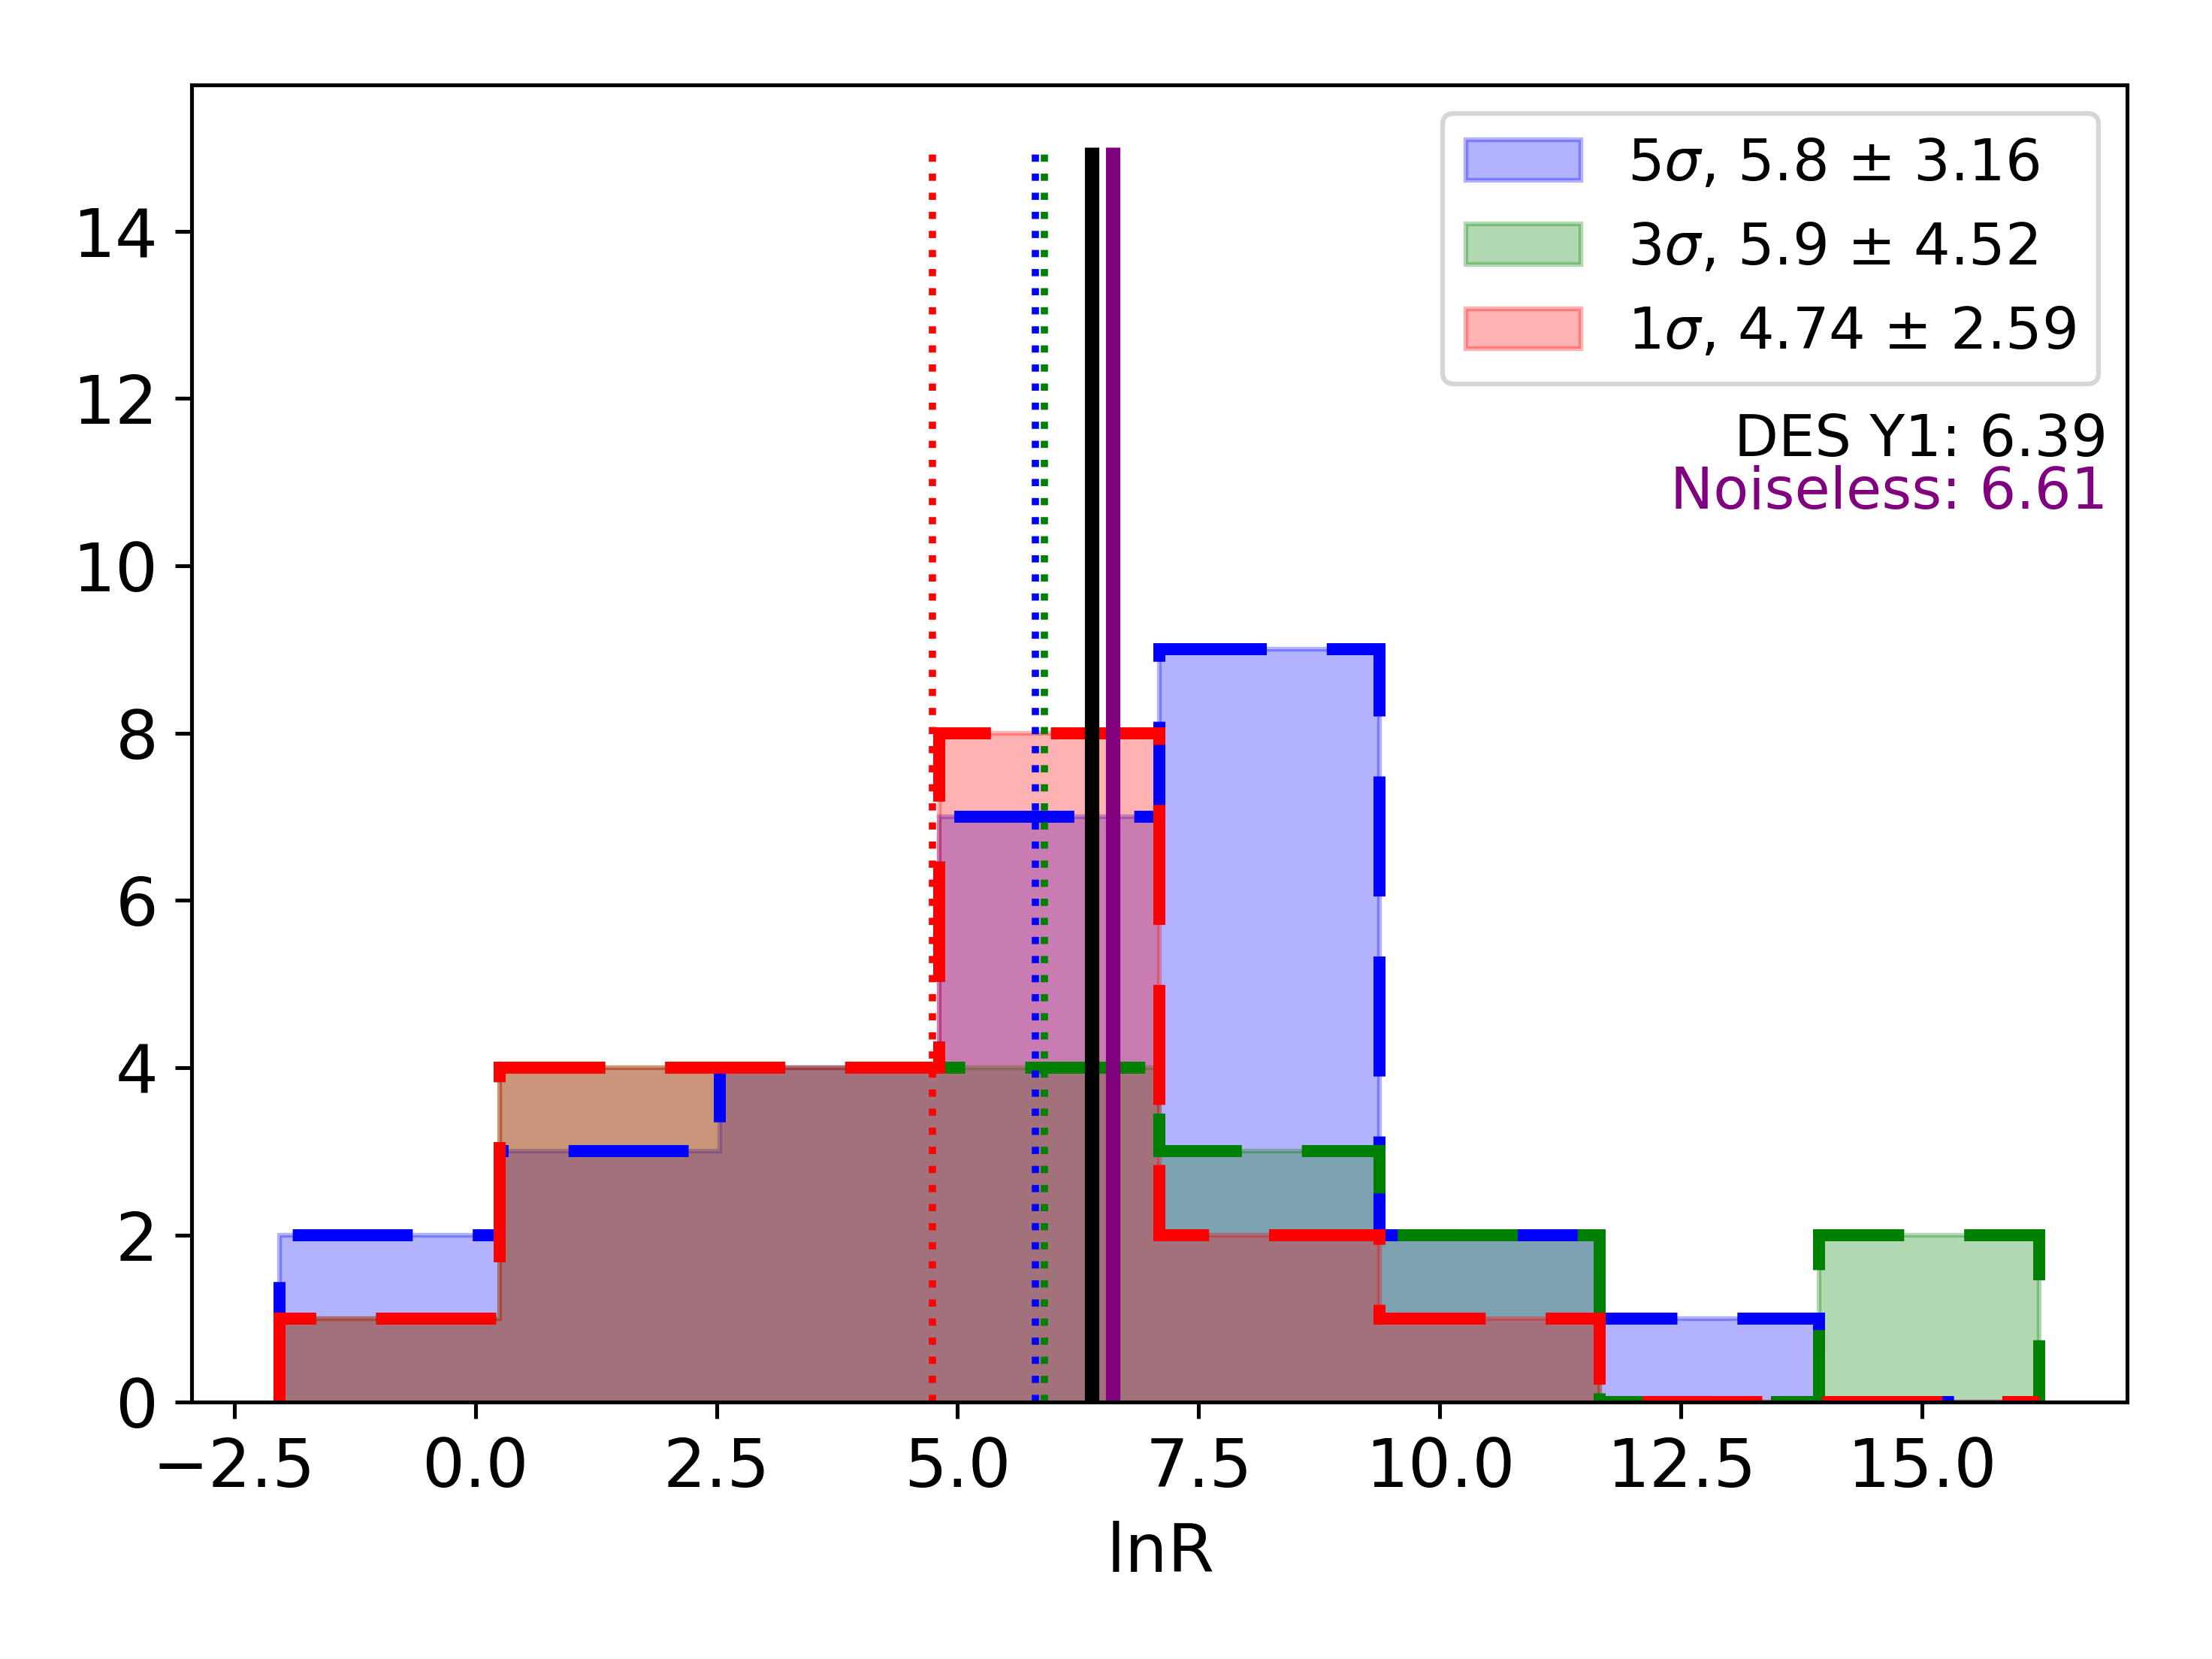